## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  22.391857  1299.552999  0.282828  8.954496  1.480929
1  12.433247  1378.433409  0.787477  2.683867  1.590855
2  99.412587  1513.534039  0.244832  4.775071  1.290920
3  41.120770   934.157056  0.518576  3.852141  1.376873
4  68.456850   308.037625  0.529025  4.807594  1.167161


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8789953	total: 57.4ms	remaining: 57.4s
1:	learn: 0.8711138	total: 58.7ms	remaining: 29.3s
2:	learn: 0.8641184	total: 59.3ms	remaining: 19.7s
3:	learn: 0.8561867	total: 60.1ms	remaining: 15s
4:	learn: 0.8485147	total: 60.6ms	remaining: 12.1s
5:	learn: 0.8415580	total: 61.4ms	remaining: 10.2s
6:	learn: 0.8345380	total: 62.2ms	remaining: 8.82s
7:	learn: 0.8293116	total: 62.8ms	remaining: 7.79s
8:	learn: 0.8223150	total: 63.6ms	remaining: 7s
9:	learn: 0.8143355	total: 64.1ms	remaining: 6.35s
10:	learn: 0.8079316	total: 64.6ms	remaining: 5.81s
11:	learn: 0.8012136	total: 65.1ms	remaining: 5.36s
12:	learn: 0.7951062	total: 65.6ms	remaining: 4.98s
13:	learn: 0.7897610	total: 66ms	remaining: 4.65s
14:	learn: 0.7829832	total: 66.7ms	remaining: 4.38s
15:	learn: 0.7767051	total: 67.1ms	remaining: 4.13s
16:	learn: 0.7706388	total: 67.5ms	remaining: 3.9s
17:	learn: 0.7656949	total: 67.9ms	remaining: 3.71s
18:	learn: 0.7594294	total: 68.3ms	remaining: 3.53s


101:	learn: 0.4311312	total: 105ms	remaining: 927ms
102:	learn: 0.4288929	total: 106ms	remaining: 926ms
103:	learn: 0.4262847	total: 107ms	remaining: 919ms
104:	learn: 0.4241121	total: 107ms	remaining: 913ms
105:	learn: 0.4216044	total: 108ms	remaining: 908ms
106:	learn: 0.4187979	total: 108ms	remaining: 902ms
107:	learn: 0.4163704	total: 108ms	remaining: 896ms
108:	learn: 0.4138794	total: 109ms	remaining: 891ms
109:	learn: 0.4114014	total: 109ms	remaining: 885ms
110:	learn: 0.4087630	total: 110ms	remaining: 879ms
111:	learn: 0.4067510	total: 110ms	remaining: 872ms
112:	learn: 0.4049826	total: 110ms	remaining: 866ms
113:	learn: 0.4038810	total: 111ms	remaining: 860ms
114:	learn: 0.4016664	total: 111ms	remaining: 855ms
115:	learn: 0.3993310	total: 111ms	remaining: 850ms
116:	learn: 0.3974643	total: 112ms	remaining: 845ms
117:	learn: 0.3949699	total: 112ms	remaining: 839ms
118:	learn: 0.3929670	total: 113ms	remaining: 834ms
119:	learn: 0.3908008	total: 113ms	remaining: 828ms
120:	learn: 

283:	learn: 0.1943401	total: 185ms	remaining: 467ms
284:	learn: 0.1936461	total: 186ms	remaining: 466ms
285:	learn: 0.1925504	total: 186ms	remaining: 465ms
286:	learn: 0.1922660	total: 187ms	remaining: 464ms
287:	learn: 0.1920455	total: 187ms	remaining: 463ms
288:	learn: 0.1917995	total: 188ms	remaining: 461ms
289:	learn: 0.1911413	total: 188ms	remaining: 460ms
290:	learn: 0.1900477	total: 188ms	remaining: 459ms
291:	learn: 0.1894228	total: 189ms	remaining: 458ms
292:	learn: 0.1884960	total: 189ms	remaining: 457ms
293:	learn: 0.1875430	total: 190ms	remaining: 456ms
294:	learn: 0.1873247	total: 190ms	remaining: 455ms
295:	learn: 0.1866012	total: 191ms	remaining: 453ms
296:	learn: 0.1863805	total: 191ms	remaining: 452ms
297:	learn: 0.1859697	total: 191ms	remaining: 451ms
298:	learn: 0.1847590	total: 192ms	remaining: 449ms
299:	learn: 0.1841124	total: 192ms	remaining: 448ms
300:	learn: 0.1835897	total: 193ms	remaining: 447ms
301:	learn: 0.1832577	total: 193ms	remaining: 446ms
302:	learn: 

508:	learn: 0.0990080	total: 287ms	remaining: 277ms
509:	learn: 0.0984988	total: 287ms	remaining: 276ms
510:	learn: 0.0983049	total: 288ms	remaining: 275ms
511:	learn: 0.0981143	total: 288ms	remaining: 275ms
512:	learn: 0.0977292	total: 289ms	remaining: 274ms
513:	learn: 0.0972849	total: 289ms	remaining: 273ms
514:	learn: 0.0972017	total: 290ms	remaining: 273ms
515:	learn: 0.0971196	total: 290ms	remaining: 272ms
516:	learn: 0.0966179	total: 291ms	remaining: 271ms
517:	learn: 0.0965373	total: 291ms	remaining: 271ms
518:	learn: 0.0961517	total: 291ms	remaining: 270ms
519:	learn: 0.0957287	total: 292ms	remaining: 269ms
520:	learn: 0.0952489	total: 292ms	remaining: 269ms
521:	learn: 0.0950403	total: 292ms	remaining: 268ms
522:	learn: 0.0949616	total: 293ms	remaining: 267ms
523:	learn: 0.0947562	total: 293ms	remaining: 266ms
524:	learn: 0.0946789	total: 294ms	remaining: 266ms
525:	learn: 0.0946027	total: 294ms	remaining: 265ms
526:	learn: 0.0944008	total: 294ms	remaining: 264ms
527:	learn: 

691:	learn: 0.0577336	total: 367ms	remaining: 163ms
692:	learn: 0.0575138	total: 368ms	remaining: 163ms
693:	learn: 0.0574126	total: 368ms	remaining: 162ms
694:	learn: 0.0572139	total: 368ms	remaining: 162ms
695:	learn: 0.0571647	total: 369ms	remaining: 161ms
696:	learn: 0.0569513	total: 369ms	remaining: 160ms
697:	learn: 0.0568519	total: 369ms	remaining: 160ms
698:	learn: 0.0567542	total: 370ms	remaining: 159ms
699:	learn: 0.0566889	total: 371ms	remaining: 159ms
700:	learn: 0.0565438	total: 371ms	remaining: 158ms
701:	learn: 0.0563303	total: 371ms	remaining: 158ms
702:	learn: 0.0561095	total: 371ms	remaining: 157ms
703:	learn: 0.0559677	total: 372ms	remaining: 156ms
704:	learn: 0.0558724	total: 372ms	remaining: 156ms
705:	learn: 0.0556307	total: 373ms	remaining: 155ms
706:	learn: 0.0555822	total: 373ms	remaining: 155ms
707:	learn: 0.0553941	total: 373ms	remaining: 154ms
708:	learn: 0.0553436	total: 374ms	remaining: 153ms
709:	learn: 0.0552196	total: 374ms	remaining: 153ms
710:	learn: 

936:	learn: 0.0327558	total: 469ms	remaining: 31.5ms
937:	learn: 0.0326939	total: 469ms	remaining: 31ms
938:	learn: 0.0326004	total: 470ms	remaining: 30.5ms
939:	learn: 0.0325740	total: 470ms	remaining: 30ms
940:	learn: 0.0325129	total: 471ms	remaining: 29.5ms
941:	learn: 0.0324869	total: 471ms	remaining: 29ms
942:	learn: 0.0324258	total: 472ms	remaining: 28.5ms
943:	learn: 0.0323873	total: 472ms	remaining: 28ms
944:	learn: 0.0323325	total: 472ms	remaining: 27.5ms
945:	learn: 0.0322719	total: 473ms	remaining: 27ms
946:	learn: 0.0321802	total: 473ms	remaining: 26.5ms
947:	learn: 0.0321205	total: 473ms	remaining: 26ms
948:	learn: 0.0320522	total: 474ms	remaining: 25.5ms
949:	learn: 0.0319983	total: 474ms	remaining: 25ms
950:	learn: 0.0319385	total: 475ms	remaining: 24.5ms
951:	learn: 0.0319010	total: 475ms	remaining: 24ms
952:	learn: 0.0318419	total: 476ms	remaining: 23.5ms
953:	learn: 0.0317886	total: 476ms	remaining: 22.9ms
954:	learn: 0.0317301	total: 476ms	remaining: 22.4ms
955:	lear

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

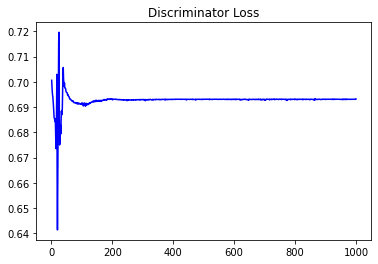

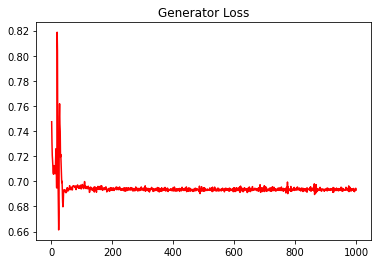

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.9249761758554911


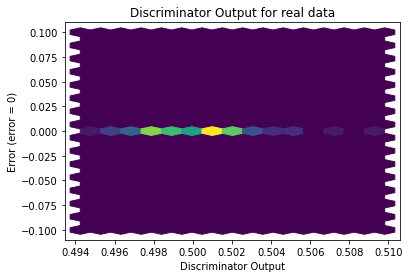

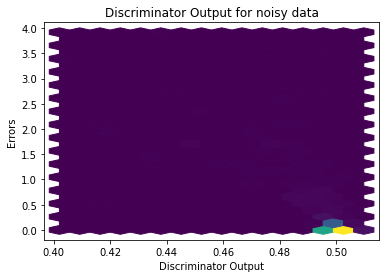

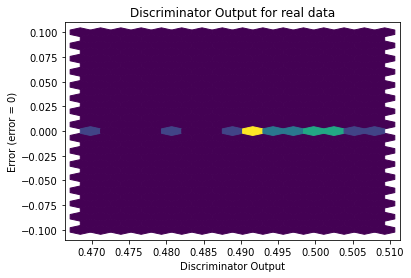

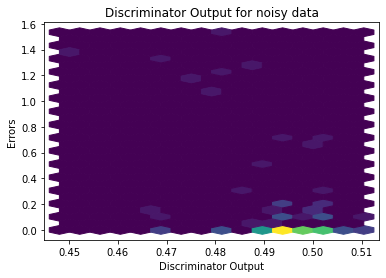

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


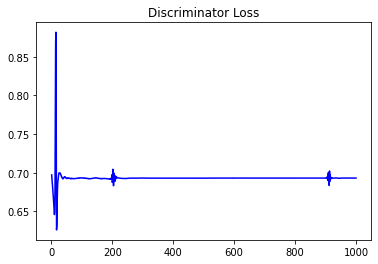

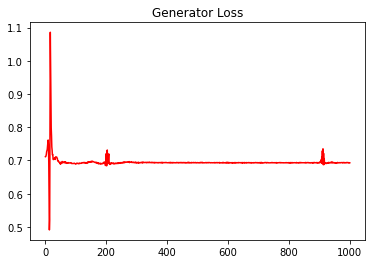

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.8903495373745881


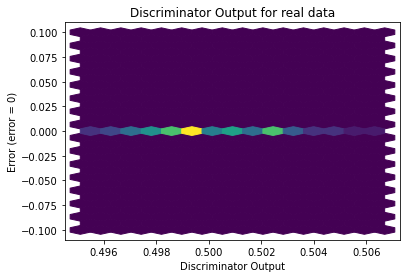

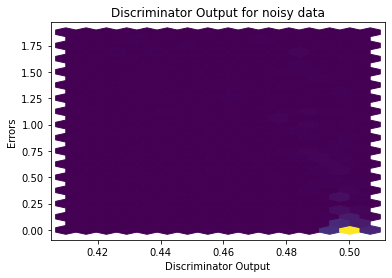

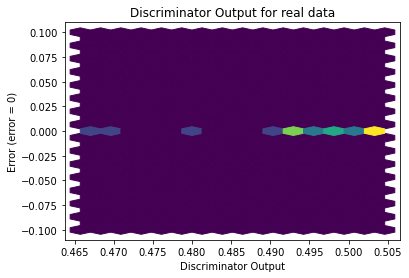

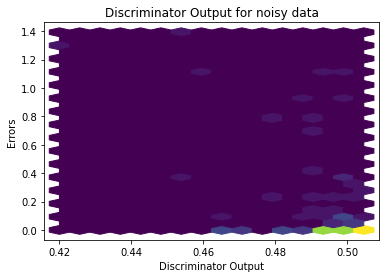

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0670]], requires_grad=True)
